In [25]:
# Import libraries used for the Project
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import skew, kurtosis

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
X_train = pd.read_csv("X_train.csv")
X_val = pd.read_csv("X_val.csv")
X_test = pd.read_csv("X_test.csv")

y_train = pd.read_csv("y_train.csv")
y_val = pd.read_csv("y_val.csv")
y_test = pd.read_csv("y_test.csv")

In [27]:
# Choose the number of features
top6_features = ['Rain_mm', 'RH_9am', 'RH_3pm', 'Temp_3pm', 'Max_Temp', 'Temp_9am']

PART 5 - REGRESSION

5.1 - Parameter Tunning

In [28]:
# We saw in the first plot that after 6 features we didn't have much of an improvement, now we will look for Parameters
# The following will be the parameters

parameters = {
    'C': [0.1, 1, 5, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
} 


In [29]:
# As we have various parameters that don't allow to visualize, we are going to use GridSearchCV
log_reg = LogisticRegression()

# Run the search
grid_search = GridSearchCV(log_reg, parameters, cv=5)
grid_search.fit(X_train, y_train)

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [30]:
# Look at the results 
print("Parameters: ", grid_search.best_params_)
print("Score: ", grid_search.best_score_)

Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Score:  0.8986872355444089


5.2 Testing the Model 

In [31]:
# We found that the best scoring model on the validation is with the top 2 featues, 3 neighbours and any metric will be ok
log_reg = LogisticRegression(C=10, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(f"Testing Accuracy: {accuracy_score(y_pred, y_test).round(5) * 100}%")

Testing Accuracy: 90.294%


c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5.3 Visualising the Result

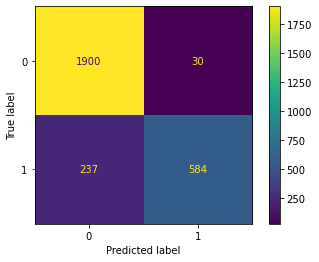

In [32]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix)
disp.plot()

In [33]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1930
           1       0.95      0.71      0.81       821

    accuracy                           0.90      2751
   macro avg       0.92      0.85      0.87      2751
weighted avg       0.91      0.90      0.90      2751

